In [1]:
#19101185 강동현 - 빅데이터 분석

#1 Solve XOR Problem
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.set_random_seed(777)
learning_rate = 0.1

In [3]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

In [4]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [6]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [7]:
W1 = tf.Variable(tf.random_normal([2,2]), name="weight1")
b1 = tf.Variable(tf.random_normal([2]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1)+b1)

In [8]:
W2 = tf.Variable(tf.random_normal([2,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2)+b2)

In [9]:
#cost.loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
#Accuracy Computation
#True if hypothesis>0.5 else False

predicted = tf.cast(hypothesis>0.5 , dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [12]:
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data , Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                X: x_data , Y: y_data}), sess.run([W1,W2]))
            
    #Accuracy report
    h,c,a = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X: x_data , Y: y_data})
    print("hypothesis: " , h)
    print("Correct:" , c)
    print("Accuracy:", a)

0 0.7539022 [array([[ 0.7988674 ,  0.6801188 ],
       [-1.2198634 , -0.30361032]], dtype=float32), array([[ 1.3752297 ],
       [-0.78823847]], dtype=float32)]
100 0.69584423 [array([[ 0.671669  ,  0.71368533],
       [-1.2917174 , -0.24467792]], dtype=float32), array([[ 1.1212678 ],
       [-0.90971726]], dtype=float32)]
200 0.694039 [array([[ 0.64527303,  0.7046098 ],
       [-1.318939  , -0.22392061]], dtype=float32), array([[ 1.0992552],
       [-0.895172 ]], dtype=float32)]
300 0.6924366 [array([[ 0.645278  ,  0.69601005],
       [-1.3529738 , -0.20636196]], dtype=float32), array([[ 1.090277 ],
       [-0.8809228]], dtype=float32)]
400 0.6908046 [array([[ 0.6665332 ,  0.6891592 ],
       [-1.3948005 , -0.19111179]], dtype=float32), array([[ 1.0908597 ],
       [-0.86969215]], dtype=float32)]
500 0.6889793 [array([[ 0.7063529 ,  0.6843806 ],
       [-1.4450662 , -0.17811841]], dtype=float32), array([[ 1.1021909 ],
       [-0.86151755]], dtype=float32)]
600 0.68681204 [array([[ 0.7

5300 0.040148474 [array([[ 5.681528 ,  5.270076 ],
       [-5.7697577, -4.940082 ]], dtype=float32), array([[ 8.184571],
       [-7.583347]], dtype=float32)]
5400 0.03865556 [array([[ 5.7034197,  5.303787 ],
       [-5.7926016, -4.974966 ]], dtype=float32), array([[ 8.250976],
       [-7.655922]], dtype=float32)]
5500 0.037264757 [array([[ 5.7244945,  5.336118 ],
       [-5.814636 , -5.0084014]], dtype=float32), array([[ 8.315342],
       [-7.72601 ]], dtype=float32)]
5600 0.035966218 [array([[ 5.7448063,  5.3671665],
       [-5.835913 , -5.0404897]], dtype=float32), array([[ 8.377787],
       [-7.793771]], dtype=float32)]
5700 0.03475129 [array([[ 5.764405 ,  5.39702  ],
       [-5.8564777, -5.0713267]], dtype=float32), array([[ 8.438415],
       [-7.859348]], dtype=float32)]
5800 0.03361243 [array([[ 5.7833366,  5.4257593],
       [-5.876374 , -5.1009974]], dtype=float32), array([[ 8.497322 ],
       [-7.9228725]], dtype=float32)]
5900 0.032542817 [array([[ 5.801642 ,  5.4534564],
  

In [13]:
#2 Recognize MNIST using NN

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
tf.set_random_seed(777)

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [17]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [18]:
#weights & bias for nn layers

W1 = tf.get_variable("W1",shape=[784,512],
                    initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2",shape=[512,512],
                    initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3",shape=[512,512],
                    initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4",shape=[512,512],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5",shape=[512,10],
                    initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [19]:
#define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [22]:
#train model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs , Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print("Learning Finished!")

Epoch: 0001 cost =  0.012564229
Epoch: 0002 cost =  0.014036785
Epoch: 0003 cost =  0.012350717
Epoch: 0004 cost =  0.014042707
Epoch: 0005 cost =  0.010669077
Epoch: 0006 cost =  0.012070993
Epoch: 0007 cost =  0.011378807
Epoch: 0008 cost =  0.008389922
Epoch: 0009 cost =  0.012746313
Epoch: 0010 cost =  0.012929004
Epoch: 0011 cost =  0.005483653
Epoch: 0012 cost =  0.010840493
Epoch: 0013 cost =  0.011454712
Epoch: 0014 cost =  0.009221496
Epoch: 0015 cost =  0.006615856
Learning Finished!


In [23]:
#Test model and check accuracy

correct_prediction = tf.equal(tf.argmax(hypothesis, 1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy',sess.run(accuracy , feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy 0.9821


Label:  [8]
Prediction:  [8]


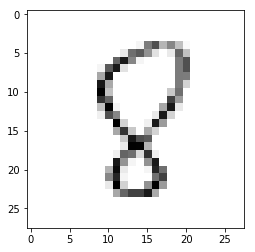

In [24]:
#Get one and predict
r = np.random.randint(0, mnist.test.num_examples - 1)
print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [25]:
#3 Recognize MNIST using CNN

from tensorflow.examples.tutorials.mnist import input_data
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
tf.set_random_seed(777)

In [27]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
#hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [29]:
#input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1,28,28,1]) # img is 28 x 28 x 1 (black and white)
Y = tf.placeholder(tf.float32, [None, 10])

In [30]:
#Define CNN
#Conv -> ReLU -> Pool -> Conv -> ReLU -> Pool -> FC

#L1

W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

In [32]:
#L2

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

In [37]:
#Final

WW = tf.get_variable("WW",shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, WW) + b

In [38]:
#define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [39]:
#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [40]:
#train model
print("Learning Strat! It takes sometime")

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs , Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print("Learning Finished!")

Learning Strat! It takes sometime
Epoch: 0001 cost =  0.362203609
Epoch: 0002 cost =  0.101598225
Epoch: 0003 cost =  0.073463953
Epoch: 0004 cost =  0.059944475
Epoch: 0005 cost =  0.049024085
Epoch: 0006 cost =  0.041813385
Epoch: 0007 cost =  0.038319849
Epoch: 0008 cost =  0.032851070
Epoch: 0009 cost =  0.027863508
Epoch: 0010 cost =  0.025451481
Epoch: 0011 cost =  0.021895088
Epoch: 0012 cost =  0.019800508
Epoch: 0013 cost =  0.017095964
Epoch: 0014 cost =  0.015109819
Epoch: 0015 cost =  0.012687741
Learning Finished!


In [41]:
#Test model and check accuracy

correct_prediction = tf.equal(tf.argmax(logits, 1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy',sess.run(accuracy , feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy 0.9878


Label:  [0]
Prediction:  [0]


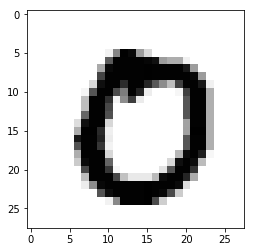

In [42]:
#Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()